# Portfolio Predictions

In [1]:
# Installing Yahoo finance for most accurate historical data
#!pip install yfinance 


In [2]:
#import needed libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
#define function to pull 10 years of historical data based on Stock Symbol

def find_stock(stock):
    ticker = stock
    data = yf.download(ticker)
    return data



## Apple Model

In [4]:
#Our first attempt will be with Apple
aapl = find_stock('AAPL')
aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


In [5]:
#Create  a function to easily calculate moving averages of 10 and 50 days on closing price for given stock
def moving_average(stock):
    stock['MA10'] = stock['Close'].rolling(window=10).mean()
    stock['MA50'] = stock['Close'].rolling(window=50).mean()
    stock = stock.dropna() #drop null values for model
    return stock


In [6]:
def get_feat_and_targets(stock):

    X = stock[['Close','MA10','MA50']]
    y = stock['Close'].shift(-1).dropna()
    X=X[:-1]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [7]:
aapl = moving_average(aapl)
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
1981-02-24,0.107143,0.107143,0.106027,0.106027,0.081736,16979200,0.114676,0.132578
1981-02-25,0.112723,0.113281,0.112723,0.112723,0.086898,19488000,0.113783,0.132266
1981-02-26,0.114397,0.114955,0.114397,0.114397,0.088188,10841600,0.113448,0.132120
1981-02-27,0.118304,0.119420,0.118304,0.118304,0.091200,14761600,0.113616,0.132232
1981-03-02,0.118862,0.119420,0.118862,0.118862,0.091630,11760000,0.114118,0.132299


In [8]:
#Definig Features and targets for model
X = aapl[['Close','MA10','MA50']]
y = aapl['Close'].shift(-1).dropna()
X=X[:-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
#Start Making Predictions
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print(f'Mean Squared error: {mse}')
print(f'R square score: {r2}')


Mean Squared error: 0.7387575337681478
R square score: 0.9996533737963275


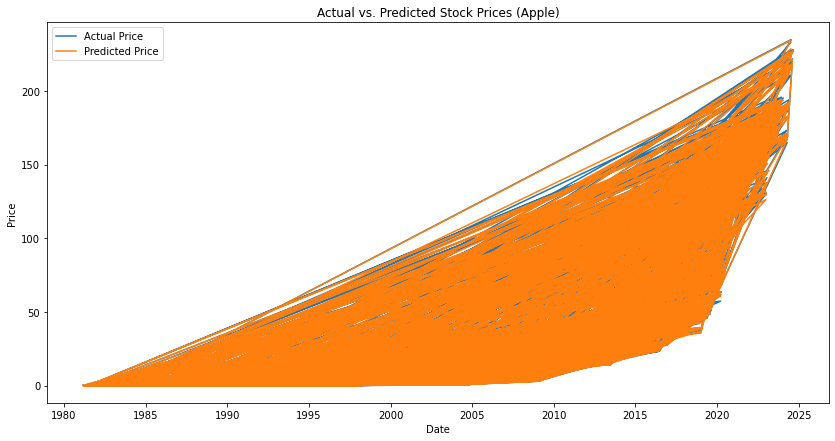

In [10]:
#Create Apple graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices (Apple)')
plt.legend()
plt.show()

## Nike Model

In [11]:
#get Nike data
nke = find_stock('NKE')
nke.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-02,0.179688,0.183594,0.179688,0.179688,0.127687,100710400
1980-12-03,0.177734,0.177734,0.175781,0.175781,0.124911,25177600
1980-12-04,0.181641,0.183594,0.181641,0.181641,0.129075,22694400
1980-12-05,0.175781,0.175781,0.171875,0.171875,0.122135,7590400
1980-12-08,0.164063,0.164063,0.162109,0.162109,0.115196,5414400


In [12]:
#Get moving averages for model

nke = moving_average(nke)
nke

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
1981-02-11,0.146484,0.148438,0.142578,0.142578,0.101317,1254400,0.148242,0.159082
1981-02-12,0.142578,0.148438,0.142578,0.142578,0.101317,217600,0.146875,0.158340
1981-02-13,0.142578,0.146484,0.140625,0.140625,0.099929,921600,0.145898,0.157637
1981-02-17,0.140625,0.144531,0.140625,0.140625,0.099929,806400,0.145312,0.156816
1981-02-18,0.144531,0.148438,0.144531,0.144531,0.102705,2201600,0.145117,0.156270
...,...,...,...,...,...,...,...,...
2024-08-21,83.669998,84.239998,83.220001,84.000000,84.000000,6915900,79.675999,79.861400
2024-08-22,84.449997,84.680000,83.209999,83.410004,83.410004,8485500,80.598000,79.612200
2024-08-23,83.339996,84.239998,83.220001,84.050003,84.050003,9219700,81.569000,79.419600


In [13]:
#Defining Features and targets for model
X = nke[['Close','MA10','MA50']]
y = nke['Close'].shift(-1).dropna()
X=X[:-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [14]:
#Get mean Squared error and R^2 score
model = LinearRegression()
model.fit(X_train,y_train)
#Start Making Predictions
predictions = model.predict(X_test)

mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print(f'Mean Squared error: {mse}')
print(f'R square score: {r2}')

Mean Squared error: 0.7646695520284733
R square score: 0.999471564228811


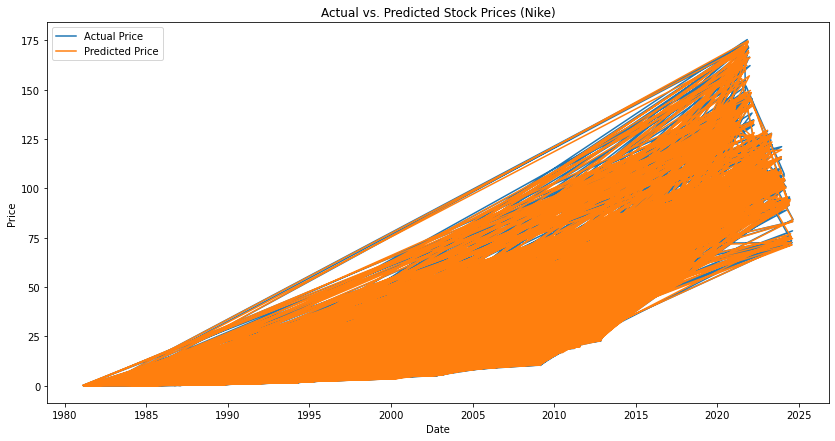

In [15]:
#Create Nike graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices (Nike)')
plt.legend()
plt.show()

## Disney Model

In [16]:
# Get Disney Data
dis = find_stock('DIS')
dis.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.092908,0.096026,0.092908,0.092908,0.057941,841958
1962-01-03,0.092908,0.094467,0.092908,0.094155,0.058719,801865
1962-01-04,0.094155,0.094467,0.093532,0.094155,0.058719,962238
1962-01-05,0.094155,0.094779,0.093844,0.094467,0.058914,962238
1962-01-08,0.094467,0.095714,0.092285,0.094155,0.058719,1282984


In [17]:
# Get moving averages
dis = moving_average(dis)
dis.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
1962-03-13,0.096650,0.098209,0.096650,0.098209,0.061406,360839,0.095184,0.095558
1962-03-14,0.098209,0.099144,0.097273,0.097273,0.060820,601399,0.095590,0.095646
1962-03-15,0.097273,0.098520,0.097273,0.097897,0.061210,280653,0.095808,0.095721
1962-03-16,0.097897,0.098209,0.097585,0.097897,0.061210,120280,0.096089,0.095795
1962-03-19,0.097897,0.098832,0.097897,0.097897,0.061210,561306,0.096338,0.095864


In [25]:
# Get features and targets
X = dis[['Close','MA10','MA50']]
y = dis['Close'].shift(-1).dropna()
X=X[:-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [26]:
#Get mean Squared error and R^2 score
model = LinearRegression()
model.fit(X_train,y_train)
#Start Making Predictions
predictions = model.predict(X_test)

mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print(f'Mean Squared error: {mse}')
print(f'R square score: {r2}')

Mean Squared error: 0.6806096315864656
R square score: 0.9995977316532633


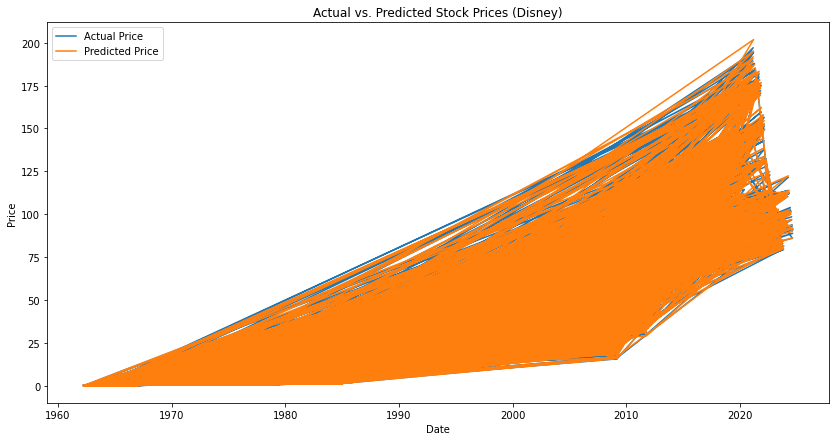

In [27]:
#Create Disney graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices (Disney)')
plt.legend()
plt.show()

## TMHC Forecast

In [21]:
tmhc = find_stock('TMHC')
tmhc.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-10,23.350000,23.780001,22.870001,23.040001,23.040001,24175600
2013-04-11,23.500000,24.190001,23.209999,24.010000,24.010000,3952600
2013-04-12,24.000000,24.690001,23.770000,24.299999,24.299999,1928200
2013-04-15,24.200001,24.530001,22.910000,23.450001,23.450001,1836200
2013-04-16,24.080000,24.090000,23.070000,23.750000,23.750000,1168700


In [22]:
tmhc = moving_average(tmhc)
tmhc.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2013-06-19,26.670000,27.670000,26.350000,26.389999,26.389999,1110000,25.187,25.3048
2013-06-20,26.110001,26.639999,24.530001,25.450001,25.450001,1409000,25.234,25.3530
2013-06-21,25.629999,25.910000,24.570000,25.170000,25.170000,3604700,25.248,25.3762
2013-06-24,24.650000,24.860001,22.910000,24.049999,24.049999,1206400,25.164,25.3712
2013-06-25,25.370001,25.500000,24.290001,24.530001,24.530001,395500,25.180,25.3928


In [28]:
X = tmhc[['Close','MA10','MA50']]
y = tmhc['Close'].shift(-1).dropna()
X=X[:-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [29]:
#Get mean Squared error and R^2 score
model = LinearRegression()
model.fit(X_train,y_train)
#Start Making Predictions
predictions = model.predict(X_test)

mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print(f'Mean Squared error: {mse}')
print(f'R square score: {r2}')

Mean Squared error: 0.38603140987376283
R square score: 0.9968424176175501


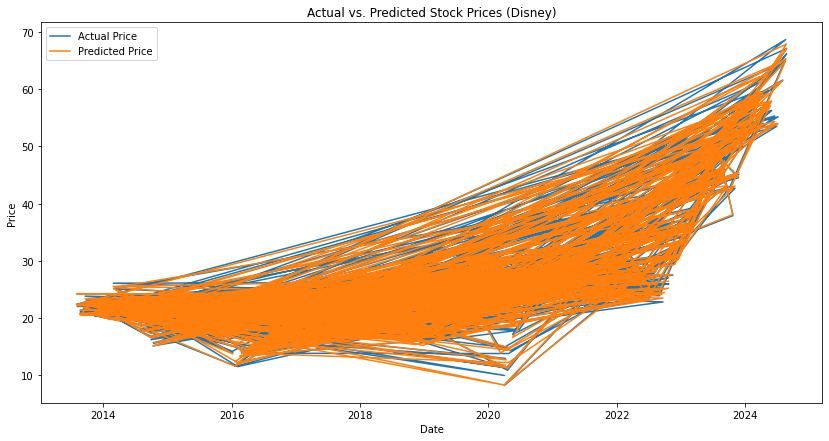

In [30]:
#Create TMHC graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices (Disney)')
plt.legend()
plt.show()

## Starbucks Forecast

In [31]:
sbux = find_stock('SBUX')
sbux.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-06-26,0.328125,0.347656,0.320313,0.335938,0.259137,224358400
1992-06-29,0.339844,0.367188,0.332031,0.359375,0.277216,58732800
1992-06-30,0.367188,0.371094,0.343750,0.347656,0.268176,34777600
1992-07-01,0.351563,0.359375,0.339844,0.355469,0.274203,18316800
1992-07-02,0.359375,0.359375,0.347656,0.355469,0.274203,13996800


In [32]:
sbux = moving_average(sbux)
sbux.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
1992-09-04,0.445313,0.453125,0.441406,0.449219,0.346520,4249600,0.401953,0.398906
1992-09-08,0.453125,0.496094,0.445313,0.486328,0.375145,17139200,0.412305,0.401914
1992-09-09,0.464844,0.488281,0.453125,0.480469,0.370626,25299200,0.422461,0.404336
1992-09-10,0.472656,0.480469,0.464844,0.476563,0.367613,8889600,0.432617,0.406914
1992-09-11,0.472656,0.500000,0.472656,0.488281,0.376652,13036800,0.443164,0.409570


In [33]:
X = sbux[['Close','MA10','MA50']]
y = sbux['Close'].shift(-1).dropna()
X=X[:-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train,y_train)
#Start Making Predictions
predictions = model.predict(X_test)

mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print(f'Mean Squared error: {mse}')
print(f'R square score: {r2}')

Mean Squared error: 0.73564722273396
R square score: 0.9993488666373382


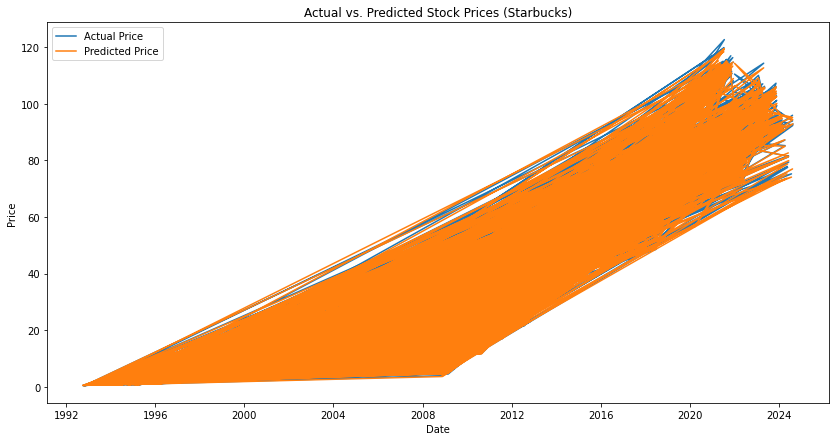

In [35]:
#Create TMHC graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices (Starbucks)')
plt.legend()
plt.show()

## Google Forecast

In [36]:
goog = find_stock('GOOG')
goog.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [37]:
goog = moving_average(goog)
goog.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2004-10-28,4.649572,4.841602,4.622673,4.814454,4.808982,596097978,4.114528,3.164309
2004-10-29,4.953682,4.980083,4.747206,4.748203,4.742805,849672890,4.230418,3.209291
2004-11-01,4.820681,4.923296,4.763894,4.882449,4.876899,490828877,4.347156,3.252987
2004-11-02,4.950943,4.962649,4.815451,4.853558,4.848041,455553149,4.464043,3.295562
2004-11-03,4.935999,5.021179,4.750942,4.773856,4.768430,557630330,4.591515,3.338800


In [38]:
X = goog[['Close','MA10','MA50']]
y = goog['Close'].shift(-1).dropna()
X=X[:-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [39]:
model = LinearRegression()
model.fit(X_train,y_train)
#Start Making Predictions
predictions = model.predict(X_test)

mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print(f'Mean Squared error: {mse}')
print(f'R square score: {r2}')

Mean Squared error: 1.2855442303578846
R square score: 0.9993336299862013


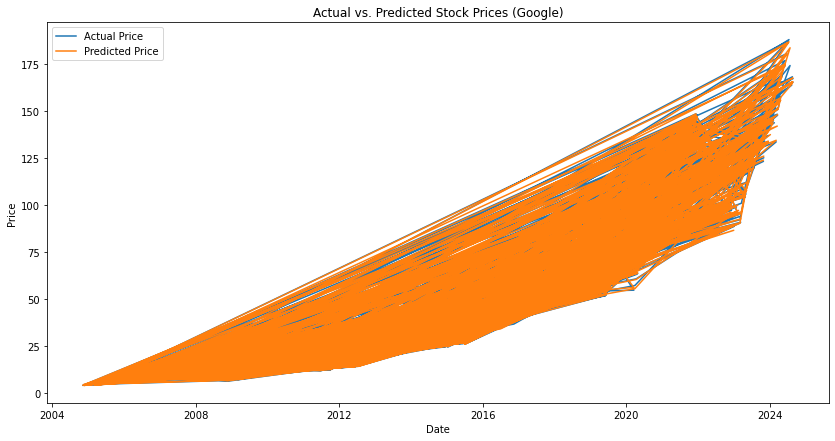

In [40]:
#Create Google graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices (Google)')
plt.legend()
plt.show()

# Bausch and Lomb

In [41]:
blco = find_stock('BLCO')
blco.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-06,18.500000,20.200001,18.400000,20.000000,20.000000,15225300
2022-05-09,18.990000,19.181999,17.799999,18.000000,18.000000,5325800
2022-05-10,18.059999,18.059999,16.250000,17.549999,17.549999,5151700
2022-05-11,17.670000,17.940001,16.370001,16.549999,16.549999,1453200
2022-05-12,16.469999,17.730000,16.010000,17.469999,17.469999,1098300


In [43]:
blco = moving_average(blco)
blco.head()

c:\Users\palum\anaconda3\envs\GreatRes\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\palum\anaconda3\envs\GreatRes\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2022-09-27,15.72,15.800000,15.06,15.49,15.49,809400,16.684,15.8702
2022-09-28,15.71,16.490000,15.60,16.08,16.08,1008200,16.579,15.8860
2022-09-29,15.96,15.960000,15.33,15.61,15.61,304200,16.364,15.8954
2022-09-30,15.65,15.900000,15.30,15.34,15.34,477300,16.141,15.8878
2022-10-03,15.48,16.450001,15.35,16.24,16.24,503600,16.014,15.9060


In [44]:
X = blco[['Close','MA10','MA50']]
y = blco['Close'].shift(-1).dropna()
X=X[:-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train,y_train)
#Start Making Predictions
predictions = model.predict(X_test)

mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print(f'Mean Squared error: {mse}')
print(f'R square score: {r2}')

Mean Squared error: 0.12526667932431632
R square score: 0.9418393564246176


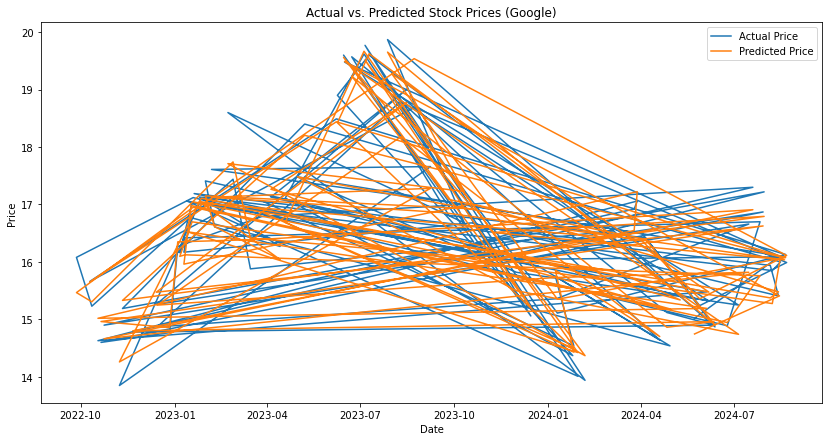

In [46]:
#Create Bausch & Lomb graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices (Google)')
plt.legend()
plt.show()

## Walmart Forecast

In [48]:
wmt = find_stock('WMT')
wmt.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-08-25,0.021159,0.021566,0.021159,0.021484,0.011664,7526400
1972-08-28,0.021484,0.021647,0.021403,0.021403,0.011620,2918400
1972-08-29,0.021322,0.021322,0.021159,0.021159,0.011488,5836800
1972-08-30,0.021159,0.021159,0.020996,0.021159,0.011488,1228800
1972-08-31,0.020996,0.020996,0.020833,0.020833,0.011311,2611200


In [49]:
wmt = moving_average(wmt)
wmt.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
1972-11-03,0.022054,0.022054,0.021973,0.022054,0.011974,4300800,0.020955,0.020352
1972-11-06,0.022054,0.022054,0.022054,0.022054,0.011974,460800,0.021110,0.020363
1972-11-08,0.022135,0.022380,0.022135,0.022298,0.012106,2150400,0.021281,0.020381
1972-11-09,0.022298,0.022298,0.022135,0.022298,0.012106,2457600,0.021492,0.020404
1972-11-10,0.022298,0.022298,0.022298,0.022298,0.012106,0,0.021688,0.020426


In [50]:
X = wmt[['Close','MA10','MA50']]
y = wmt['Close'].shift(-1).dropna()
X=X[:-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [51]:
model = LinearRegression()
model.fit(X_train,y_train)
#Start Making Predictions
predictions = model.predict(X_test)

mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print(f'Mean Squared error: {mse}')
print(f'R square score: {r2}')

Mean Squared error: 0.07332650327548684
R square score: 0.9996713077729035


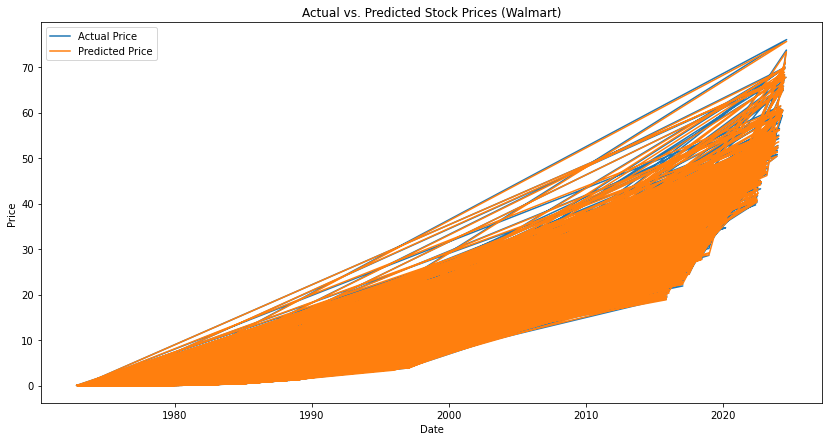

In [52]:
#Create Walmart graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices (Walmart)')
plt.legend()
plt.show()